# Viewing a heatmap

Let's go back to <a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Data+visualisation+et+collaboration/M03.D02/house_pricing.csv" target="_blank">```house pricing.csv```</a>, and try to do a little of what is commonly called :  **feature engineering**

1. Import usual librairies

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Import the dataset named ```house_pricing.csv```. Cut out the dataset to keep only the last 15 columns.

In [2]:
dataset = pd.read_csv("../../src/house_pricing.csv")
dataset = dataset.iloc[:, -15:]

In [3]:
dataset.head()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


3. Create a correlation matrix with all dataset's variables

In [10]:
corr = dataset.corr() # create  correlation matrix
corr

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
WoodDeckSF,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378,-0.009551,0.021011,0.022270,0.324413
OpenPorchSF,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762,-0.018584,0.071255,-0.057619,0.315856
EnclosedPorch,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,-0.128578
3SsnPorch,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992,0.000354,0.029474,0.018645,0.044584
ScreenPorch,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307,0.031946,0.023217,0.010694,0.111447
PoolArea,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000,0.029669,-0.033737,-0.059689,0.092404
MiscVal,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.021190
MoSold,0.021011,0.071255,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,0.046432
YrSold,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.028923
SalePrice,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


4. Create a heatmap with differentes correlations values

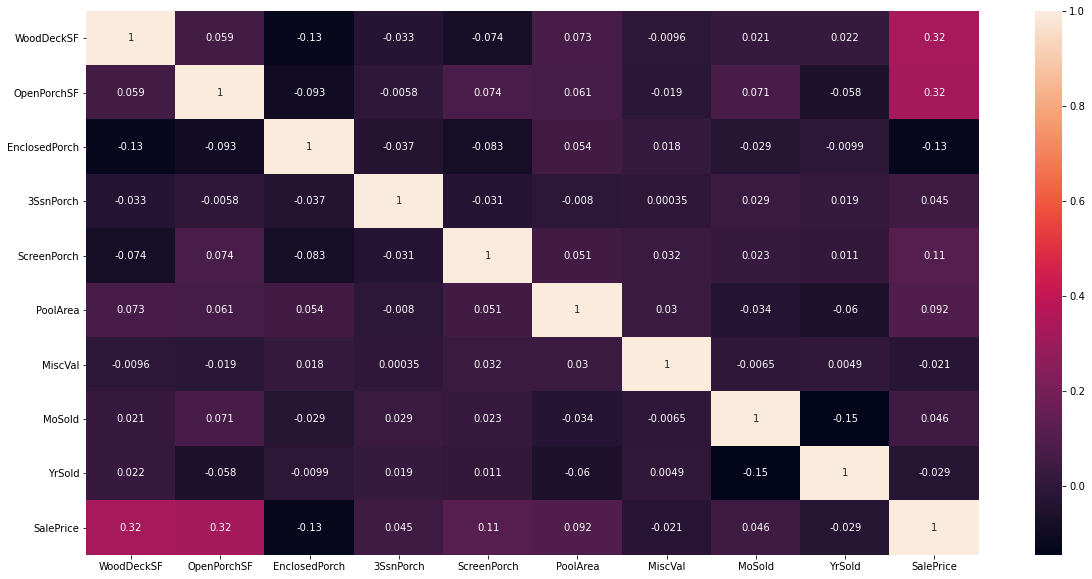

In [13]:
f, ax = plt.subplots(figsize=(20, 10)) # create a "sheet" to have bigger graph
sns.heatmap(corr, annot=True, ax=ax);

5. What is the top 3 features we should keep to predict ```SalePrice``` ?

In [14]:
corr["SalePrice"].abs().sort_values(ascending=False)

SalePrice        1.000000
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
MiscVal          0.021190
Name: SalePrice, dtype: float64

In [ ]:
# Correclation is not enough to discard a variable for a predictive model